<a href="https://colab.research.google.com/github/soundariyae/sustainable-farming-pest-disease/blob/main/rice_pest_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice pest and disease prediction

In [1]:
import numpy as np
import pandas as pd


## Import Data

In [2]:
rice_data = pd.read_csv('RICE.csv')
rice_data.head()

Observation Year  Standard Week  Pest Value Collection Type  MaxT  MinT  \
0              2003              1         0.0     Number/hill  27.9  14.8   
1              2003              2         0.0     Number/hill  27.2  15.0   
2              2003              3         0.0     Number/hill  28.7  18.3   
3              2003              4         0.0     Number/hill  25.3  16.4   
4              2003              5         0.0     Number/hill  28.8  18.7   

   RH1(%)  RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME  \
0    94.7    51.3     0.0       3.1       8.7      2.7  Brownplanthopper   
1    93.9    53.1     0.0       2.1       8.7      2.4  Brownplanthopper   
2    94.1    56.7     0.6       4.8       6.7      2.8  Brownplanthopper   
3    90.9    57.4     0.3       6.5       5.3      3.0  Brownplanthopper   
4    95.7    55.0     0.0       5.2       6.3      2.8  Brownplanthopper   

  Location  
0  Cuttack  
1  Cuttack  
2  Cuttack  
3  Cuttack  
4  Cuttack

## EDA - Exploratory Data Analysis

In [3]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline


In [4]:
rice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [5]:
rice_data.describe()

Observation Year  Standard Week     Pest Value          MaxT  \
count      19404.000000   19404.000000   19404.000000  19404.000000   
mean        2000.024789      26.473717     807.944081     31.169006   
std            9.827306      15.016247    5290.180315      4.904610   
min         1959.000000       1.000000       0.000000     10.900000   
25%         1996.000000      13.000000       0.000000     28.800000   
50%         2001.000000      26.000000       3.000000     30.900000   
75%         2007.000000      39.000000      92.000000     33.425000   
max         2011.000000      52.000000  311169.000000     71.600000   

               MinT        RH1(%)        RH2(%)        RF(mm)      WS(kmph)  \
count  19404.000000  19404.000000  19404.000000  19404.000000  19404.000000   
mean      20.404540     82.190981     53.725763     19.414152      4.501268   
std        5.388381     13.846883     18.948801     39.160009      3.194973   
min        0.800000      9.300000      6.700000      0.000000      0.000000   
25%       17.500000     79.100000     38.000000      0.000000      2.300000   
50%       22.000000     87.300000     56.600000      0.000000      3.700000   
75%       24.400000     91.000000     69.000000     21.400000      5.900000   
max       30.900000    100.000000     95.100000    444.400000     27.600000   

           SSH(hrs)       EVP(mm)  
count  19404.000000  19404.000000  
mean       6.858529      5.877180  
std        4.176542      6.536221  
min        0.000000      0.000000  
25%        4.900000      2.900000  
50%        7.300000      4.000000  
75%        8.900000      6.000000  
max      127.100000     68.300000

***We can see from the data that Pest Value is heavily skewed and would probably have many outliers for the analysis***

In [6]:
# see datatypes of the data present in dataset
rice_data.dtypes

Observation Year      int64
Standard Week         int64
Pest Value          float64
Collection Type      object
MaxT                float64
MinT                float64
RH1(%)              float64
RH2(%)              float64
RF(mm)              float64
WS(kmph)            float64
SSH(hrs)            float64
EVP(mm)             float64
PEST NAME            object
Location             object
dtype: object

In [9]:
# Creating separate frames for String and non String columns
# String or Categorical column data
object_frame = rice_data.select_dtypes(include = 'O')
# Numeric or non-string column data
numbers_frame = rice_data.select_dtypes(exclude = 'O')
object_frame

Collection Type         PEST NAME       Location
0            Number/hill  Brownplanthopper        Cuttack
1            Number/hill  Brownplanthopper        Cuttack
2            Number/hill  Brownplanthopper        Cuttack
3            Number/hill  Brownplanthopper        Cuttack
4            Number/hill  Brownplanthopper        Cuttack
...                  ...               ...            ...
19399  Number/Light trap   Yellowstemborer  Rajendranagar
19400  Number/Light trap   Yellowstemborer  Rajendranagar
19401  Number/Light trap   Yellowstemborer  Rajendranagar
19402  Number/Light trap   Yellowstemborer  Rajendranagar
19403  Number/Light trap   Yellowstemborer  Rajendranagar

[19404 rows x 3 columns]

Text(0.5, 1.0, 'Frequency of every feature')

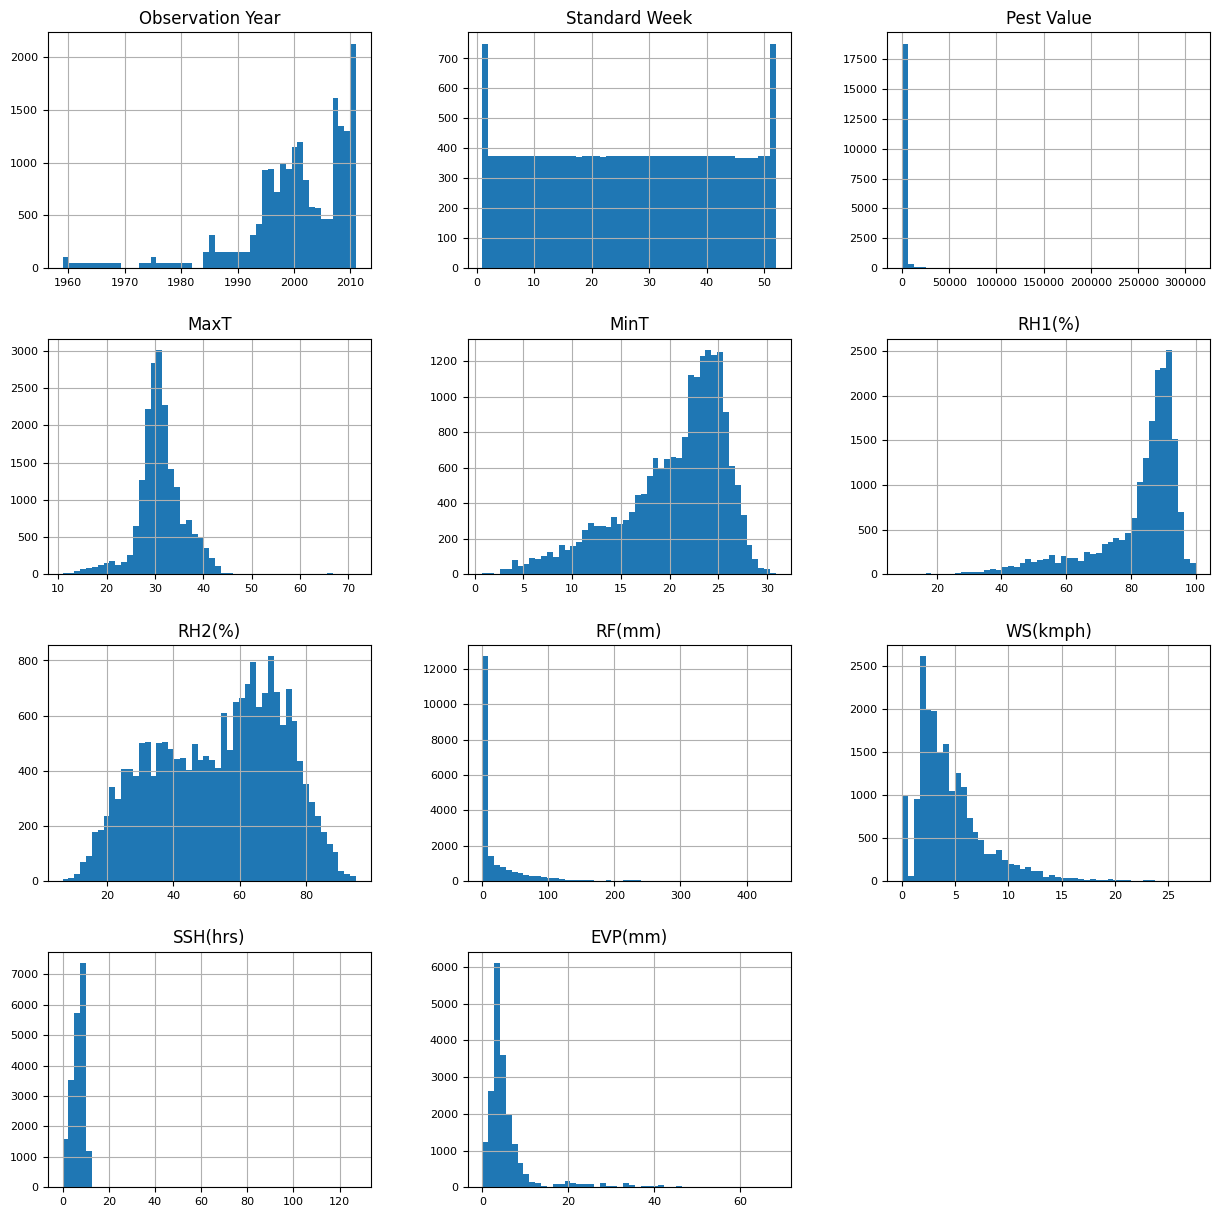

In [12]:
numbers_frame.hist(figsize=(15,15), bins=50, xlabelsize=8, ylabelsize=8)
plt.title('Frequency of every feature')

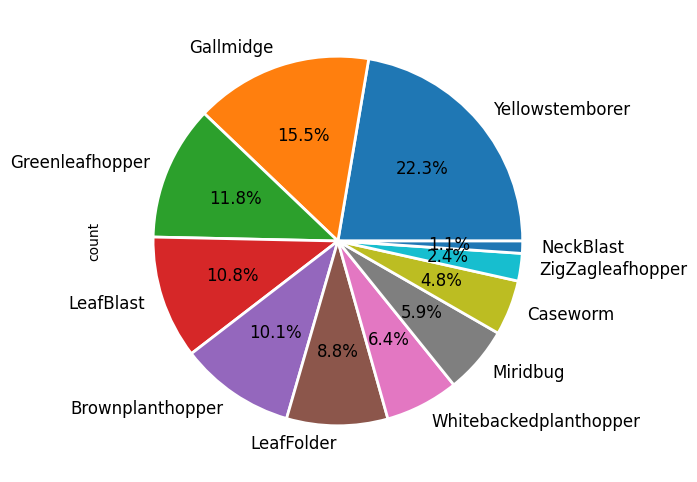

In [17]:
# Distribution of pests affecting the rice crops
plt.figure(figsize=(6,6))
ax = rice_data['PEST NAME'].value_counts().plot(kind='pie', autopct='%.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'size': 'large'})

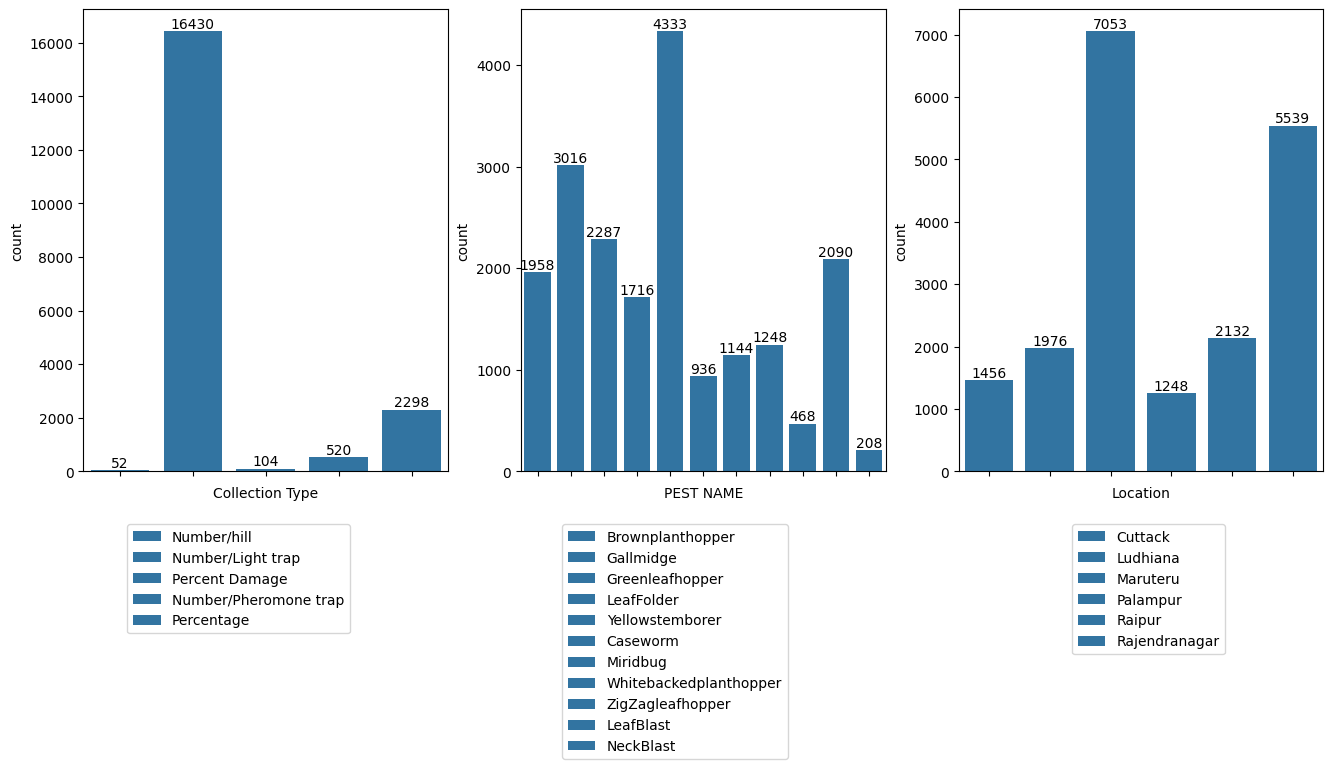

In [23]:
plt.figure(figsize=(16,6))
for i, col in enumerate(object_frame.columns.tolist()):
    ax = plt.subplot(1,3,i+1)
    sns.countplot(data=object_frame, x=col)
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.legend(ax.containers[0], object_frame[col].unique().tolist(), bbox_to_anchor=(0.75,-0.1))
    ax.set_xticklabels([])

***Based on the figures above the inference we can draw are that the data collected are predominantly using Number/Light trap methodology.***

***Yellowstemborer is the major pest that is seen in the rice plants and highest number of pests have been detected in the location of Maruteru.***



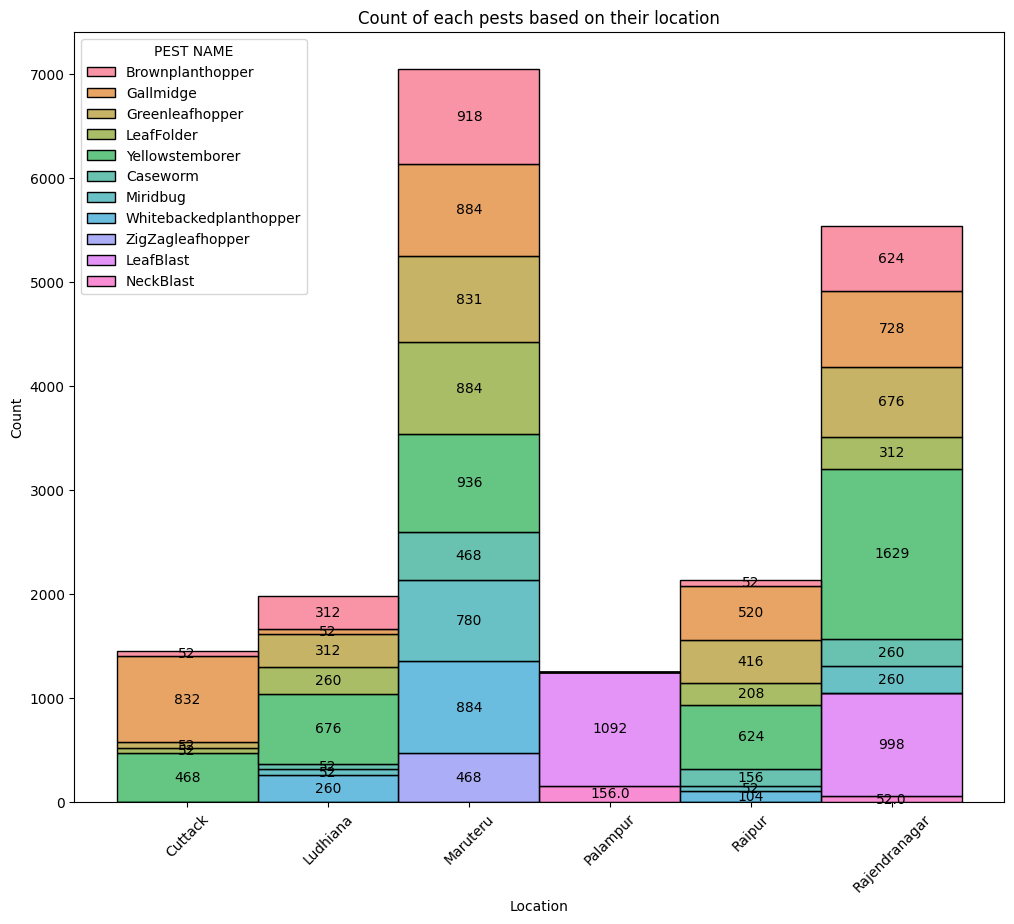

In [24]:
plt.figure(figsize=(12,10))
ax = sns.histplot(x='Location', hue='PEST NAME', data=rice_data, stat='count', multiple='stack')
plt.xticks(rotation=45)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_title('Count of each pests based on their location');



*   ***We can see that the highest number
of PEST that has infested the rice plants is Yellowstemborer which has affected across all regions except Palampur***

*   ***The rice plants of Palampur is affected by only two Pests which are LeafBlast and NeckBlast and also has the least amount of infestation among all the other crops***

*   ***The samples collected are majorly using Number/Light trap methodology***










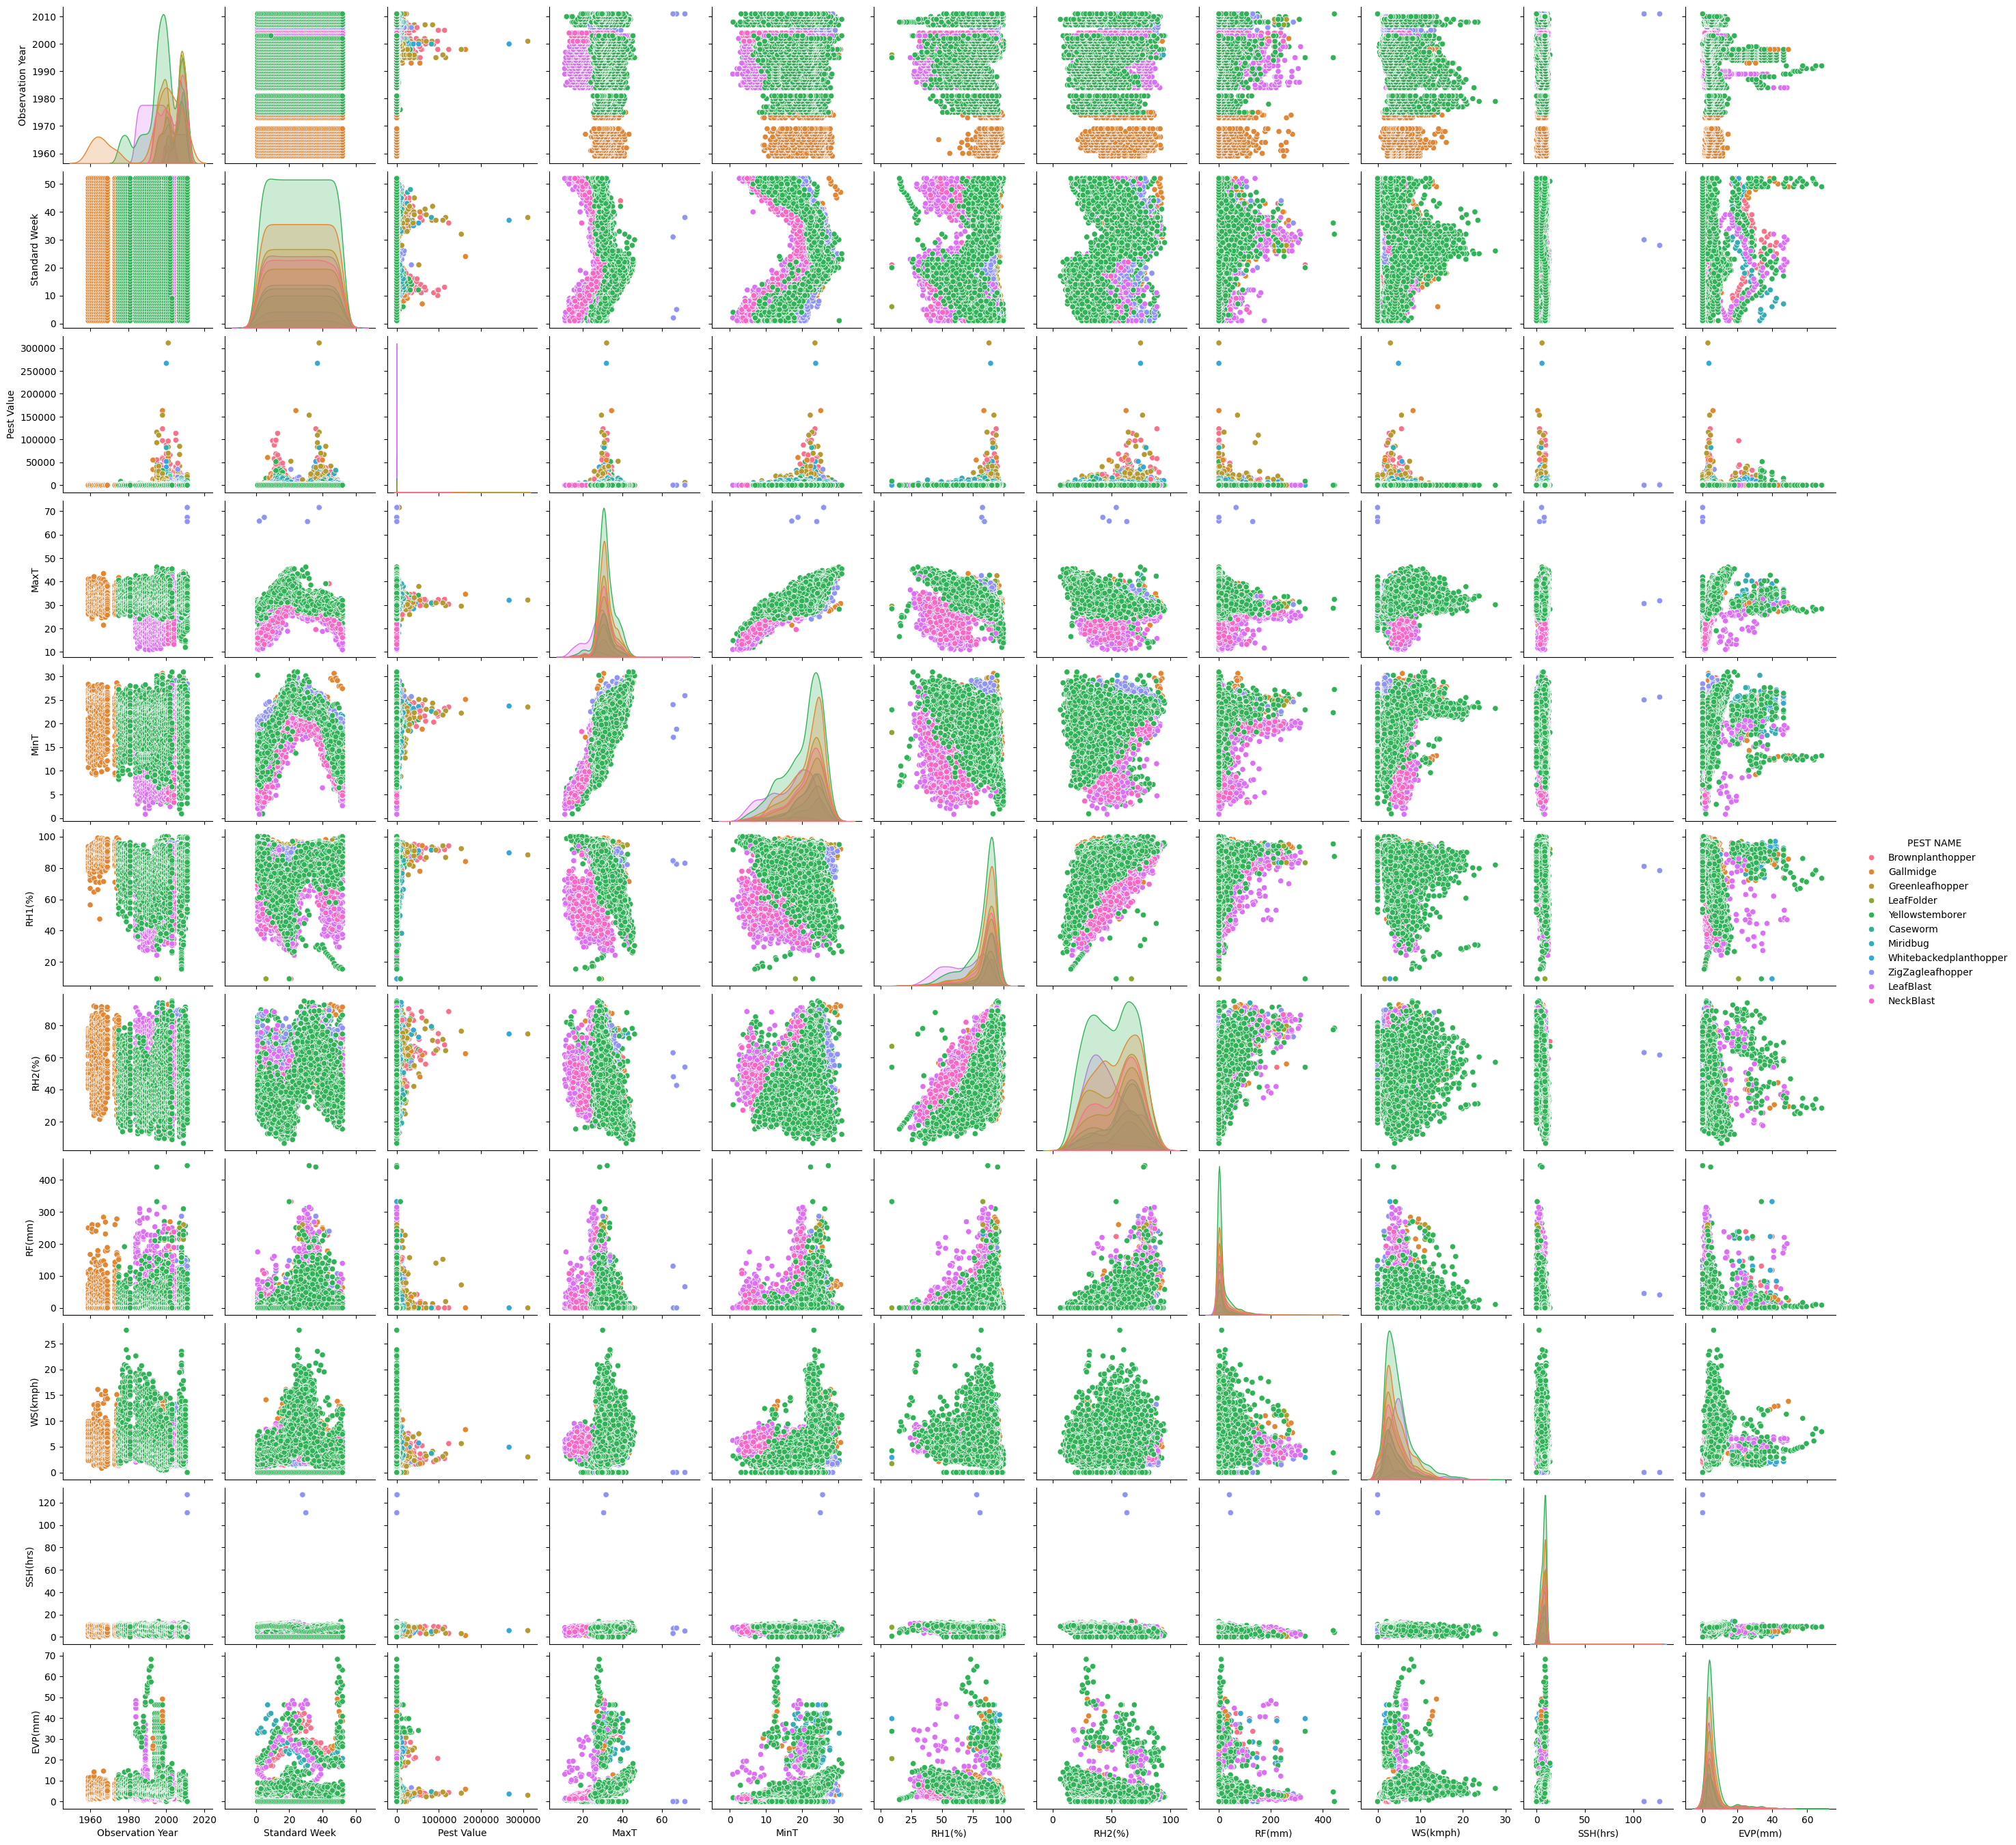

In [26]:
# Try to figure out the relation between the numerical variables

sns.pairplot(rice_data, hue='PEST NAME')

***We can see that there is no visible trends or correlation between two different features. Let us try to explore more***

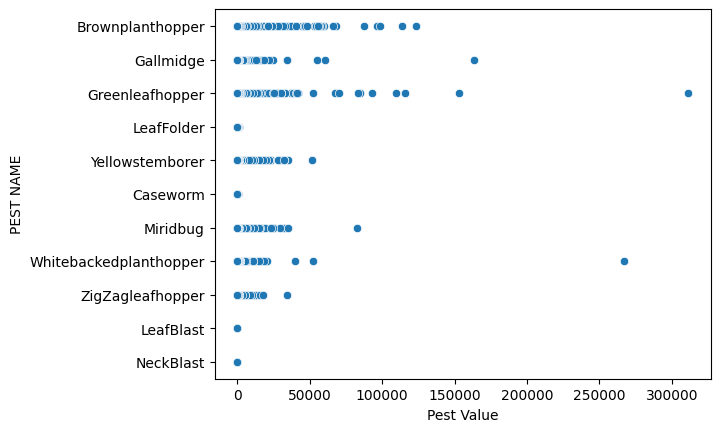

In [27]:
sns.scatterplot(data=rice_data, x='Pest Value', y='PEST NAME');

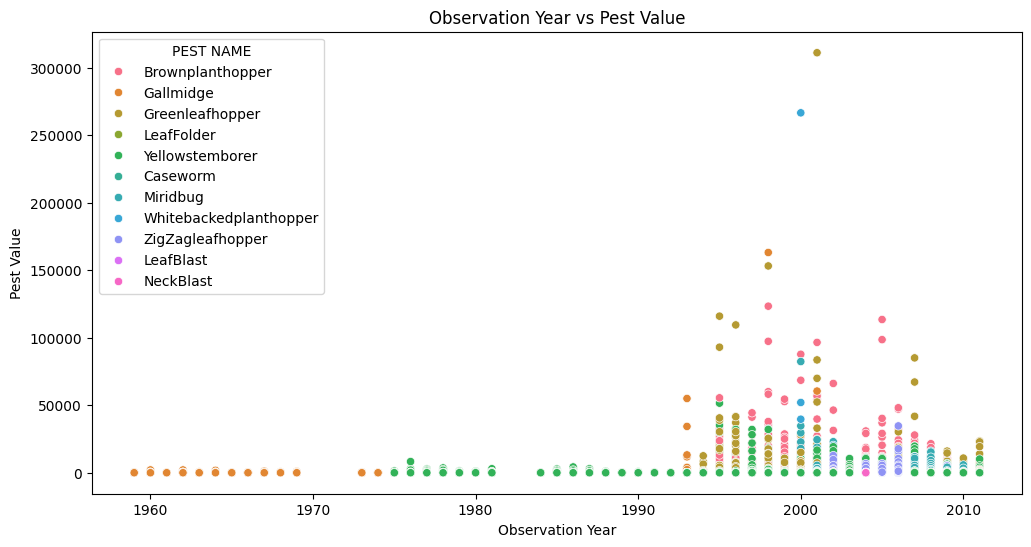

In [28]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=rice_data, x='Observation Year', y = 'Pest Value', hue='PEST NAME')
ax.set_title('Observation Year vs Pest Value');

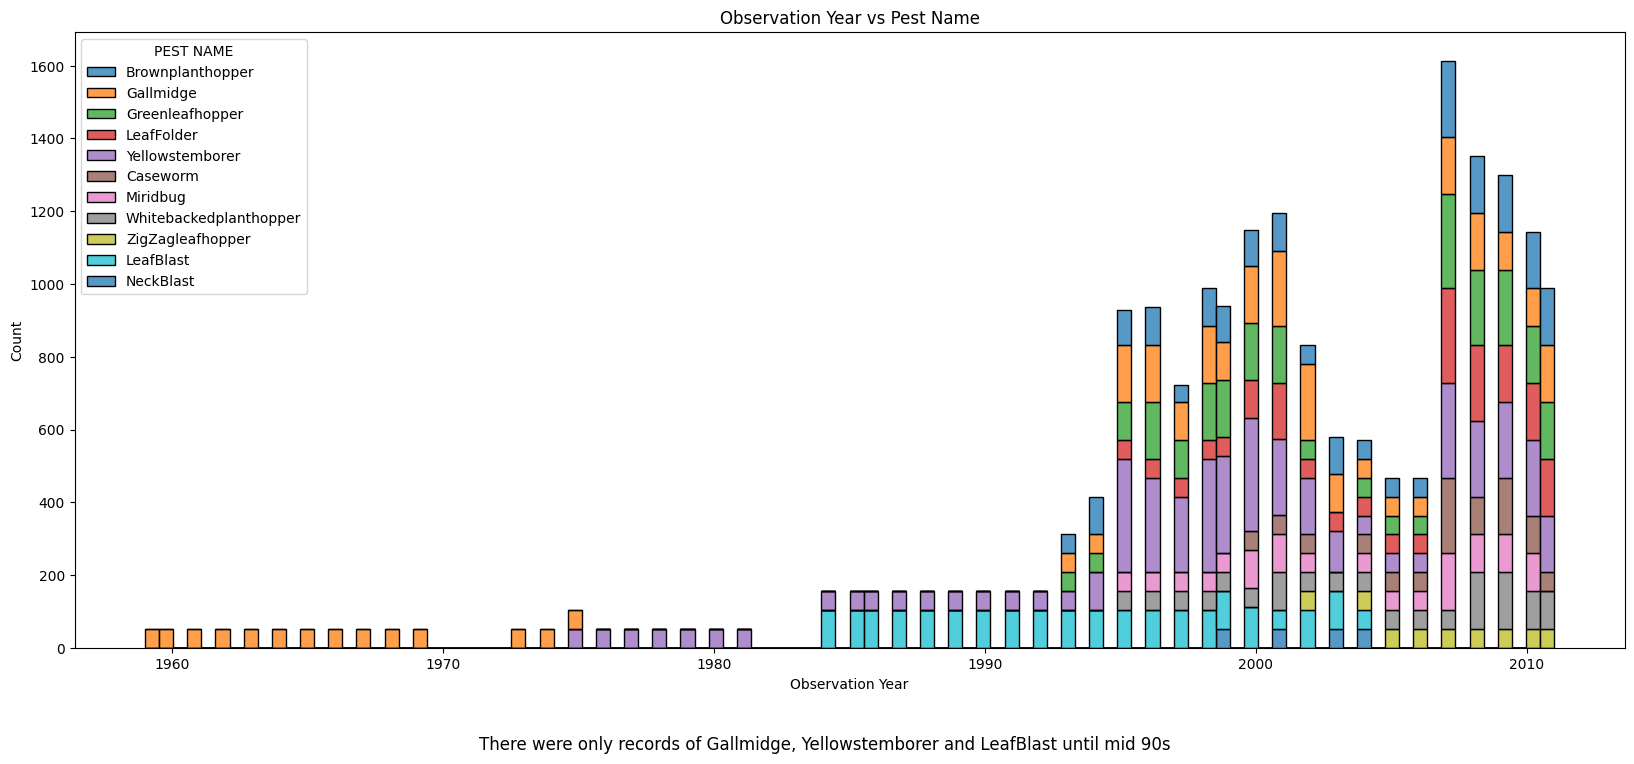

In [29]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=rice_data, x='Observation Year', hue='PEST NAME', stat='count', multiple='stack', bins=100, palette='tab10')
ax.set_title('Observation Year vs Pest Name')
plt.suptitle('There were only records of Gallmidge, Yellowstemborer and LeafBlast until mid 90s', y=0);

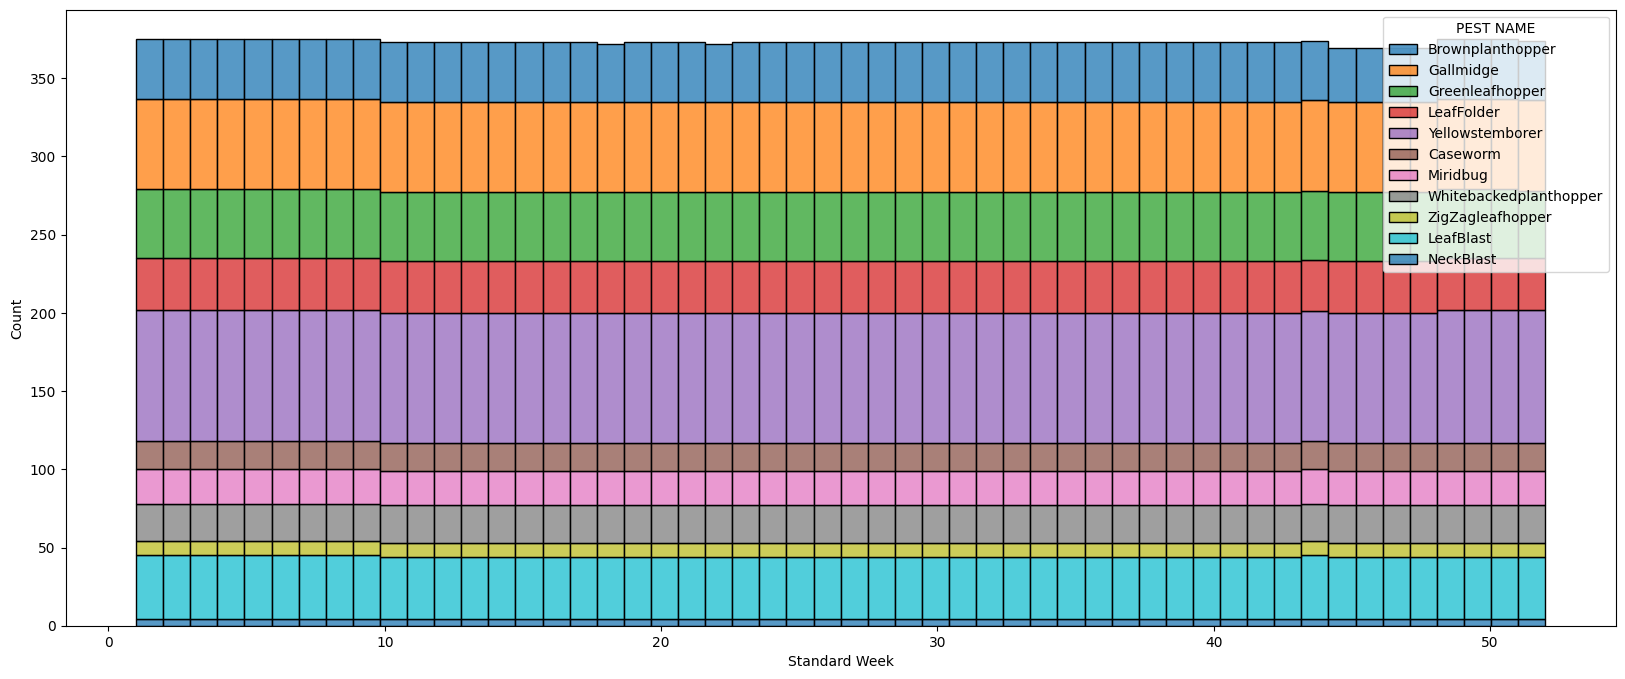

In [30]:
plt.figure(figsize = (20,8))
ax = sns.histplot(data=rice_data, x='Standard Week', hue='PEST NAME', stat='count', bins=52, multiple='stack', palette='tab10');

***We can see that there is no significant changes in the data regarding the occurence of the Pest based on the week number of the year.***

***This leads to the inference that the pest do not occur during a specific season and can be seen throughout the year. Thus we can drop the Standard week column during our predictions.***

<Figure size 1000x1000 with 0 Axes>

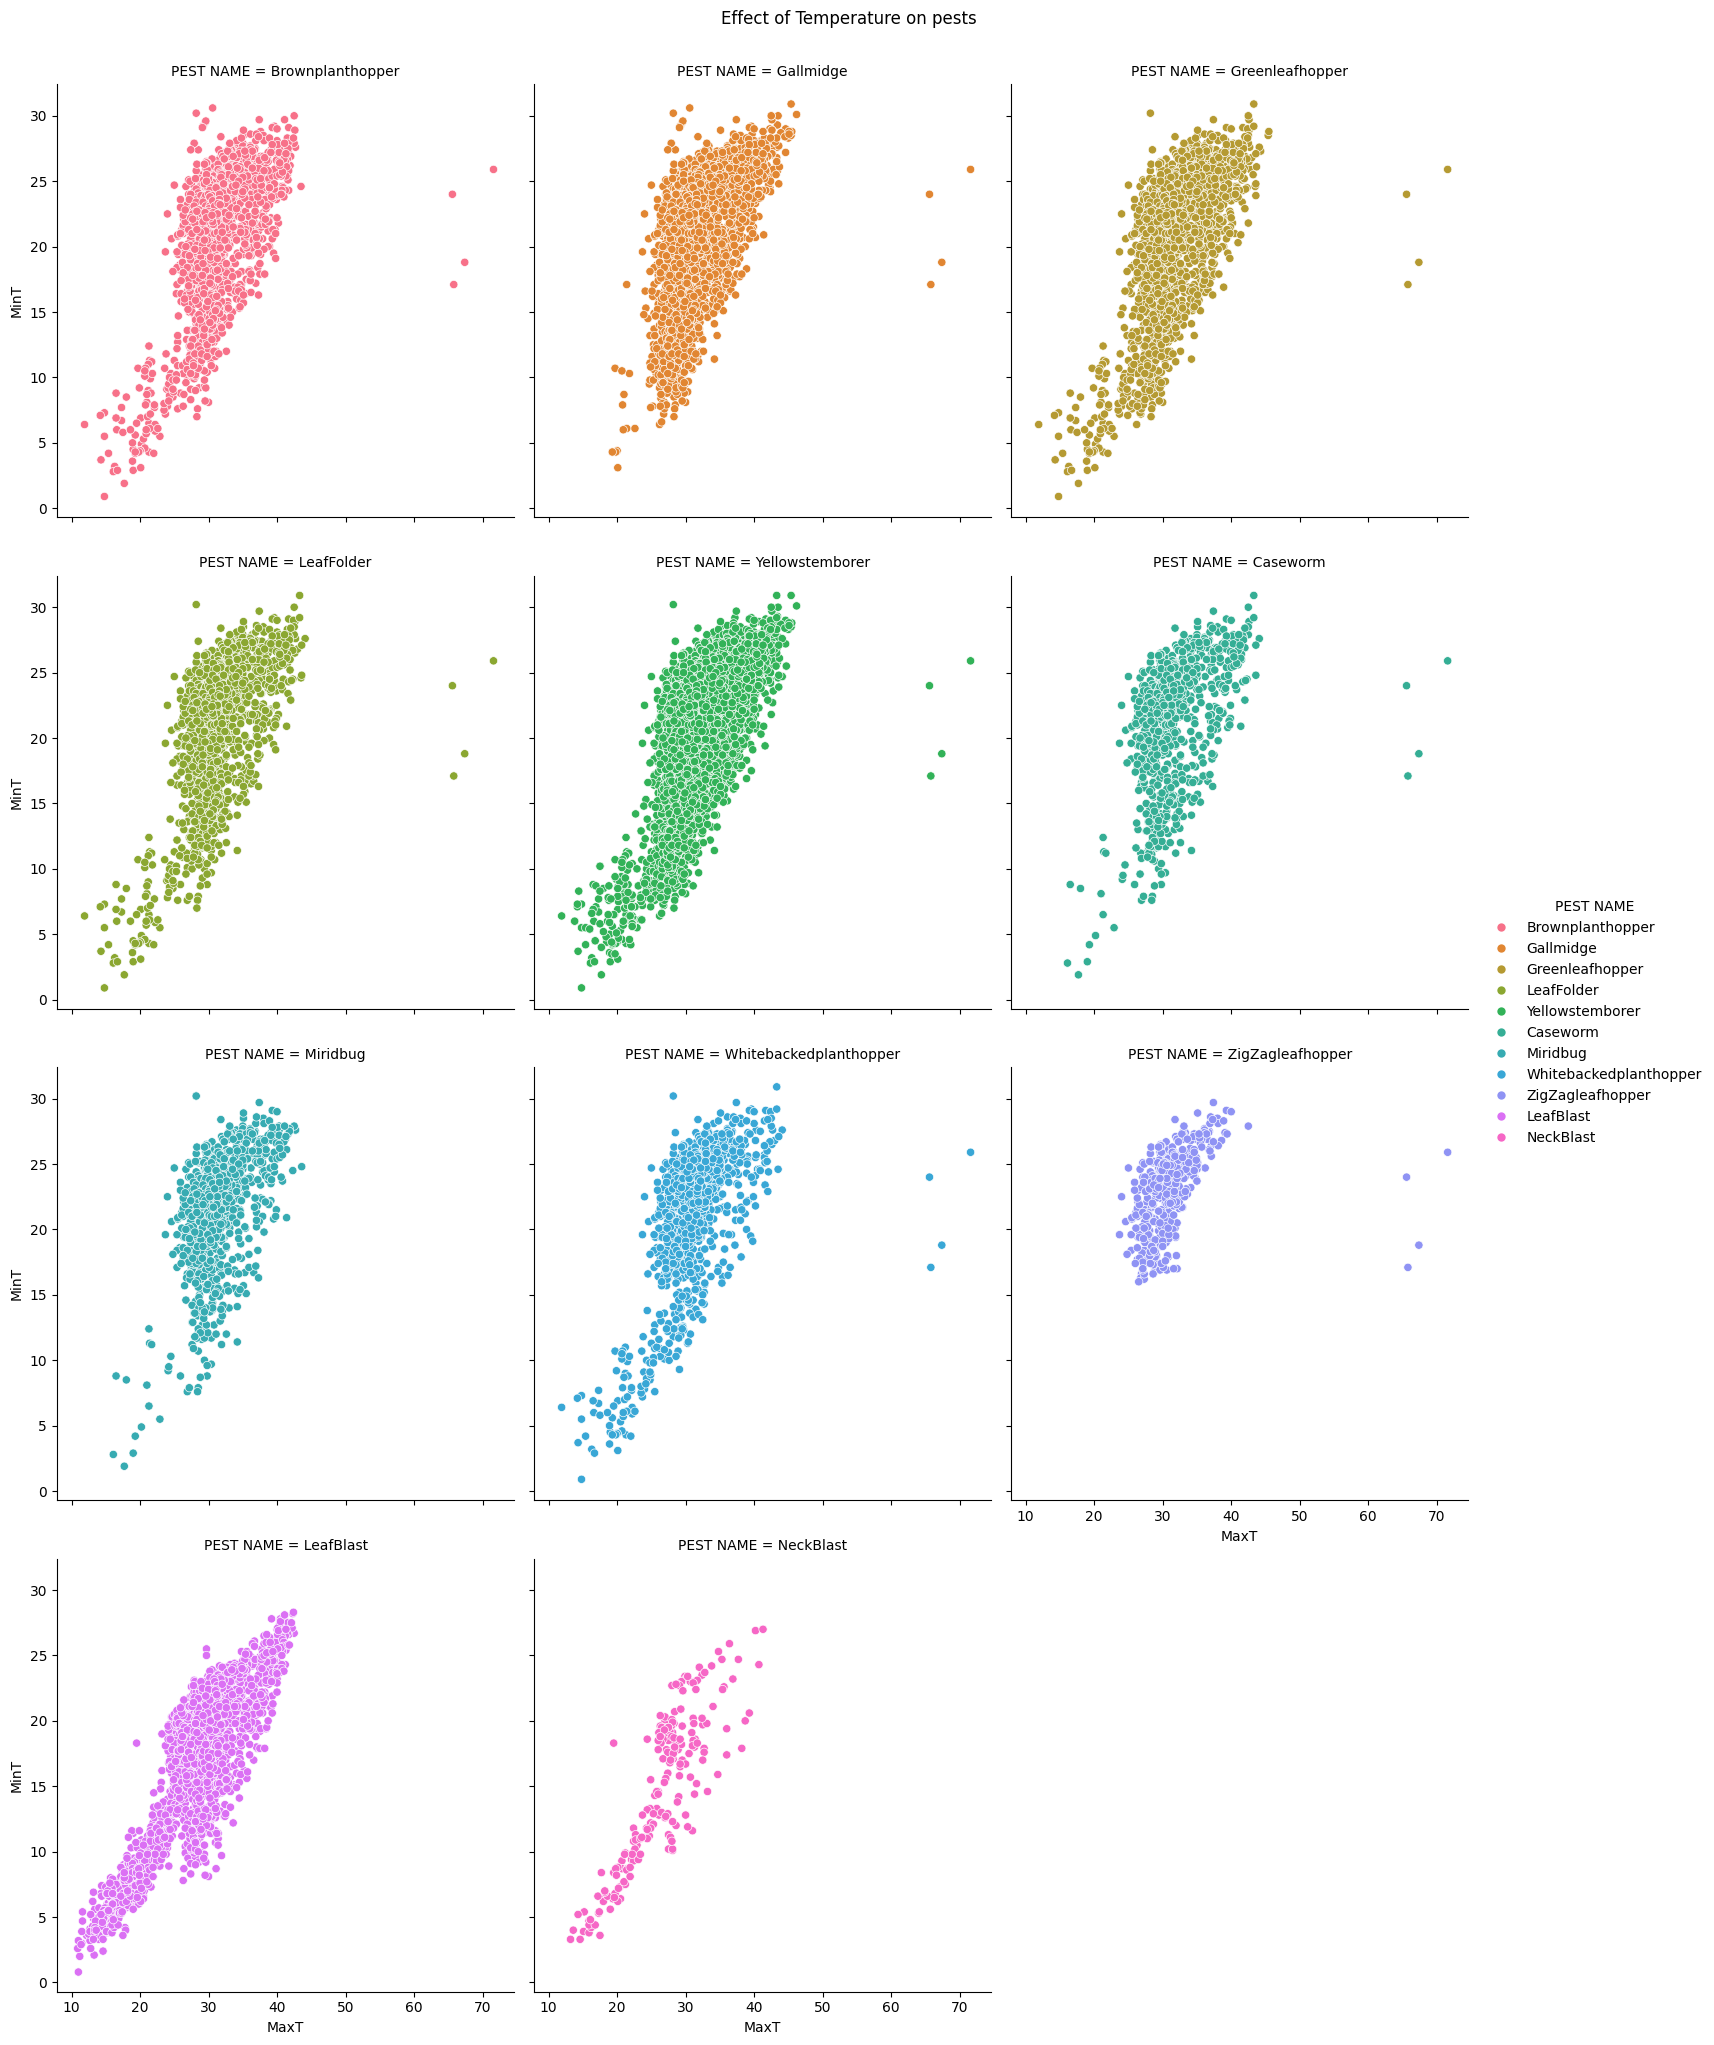

In [31]:
plt.figure(figsize=(10,10))
ax_rel = sns.relplot(data=rice_data, x='MaxT',y = 'MinT', hue='PEST NAME', col='PEST NAME', kind = 'scatter', col_wrap=3)
ax_rel.fig.suptitle('Effect of Temperature on pests', y=1.02);

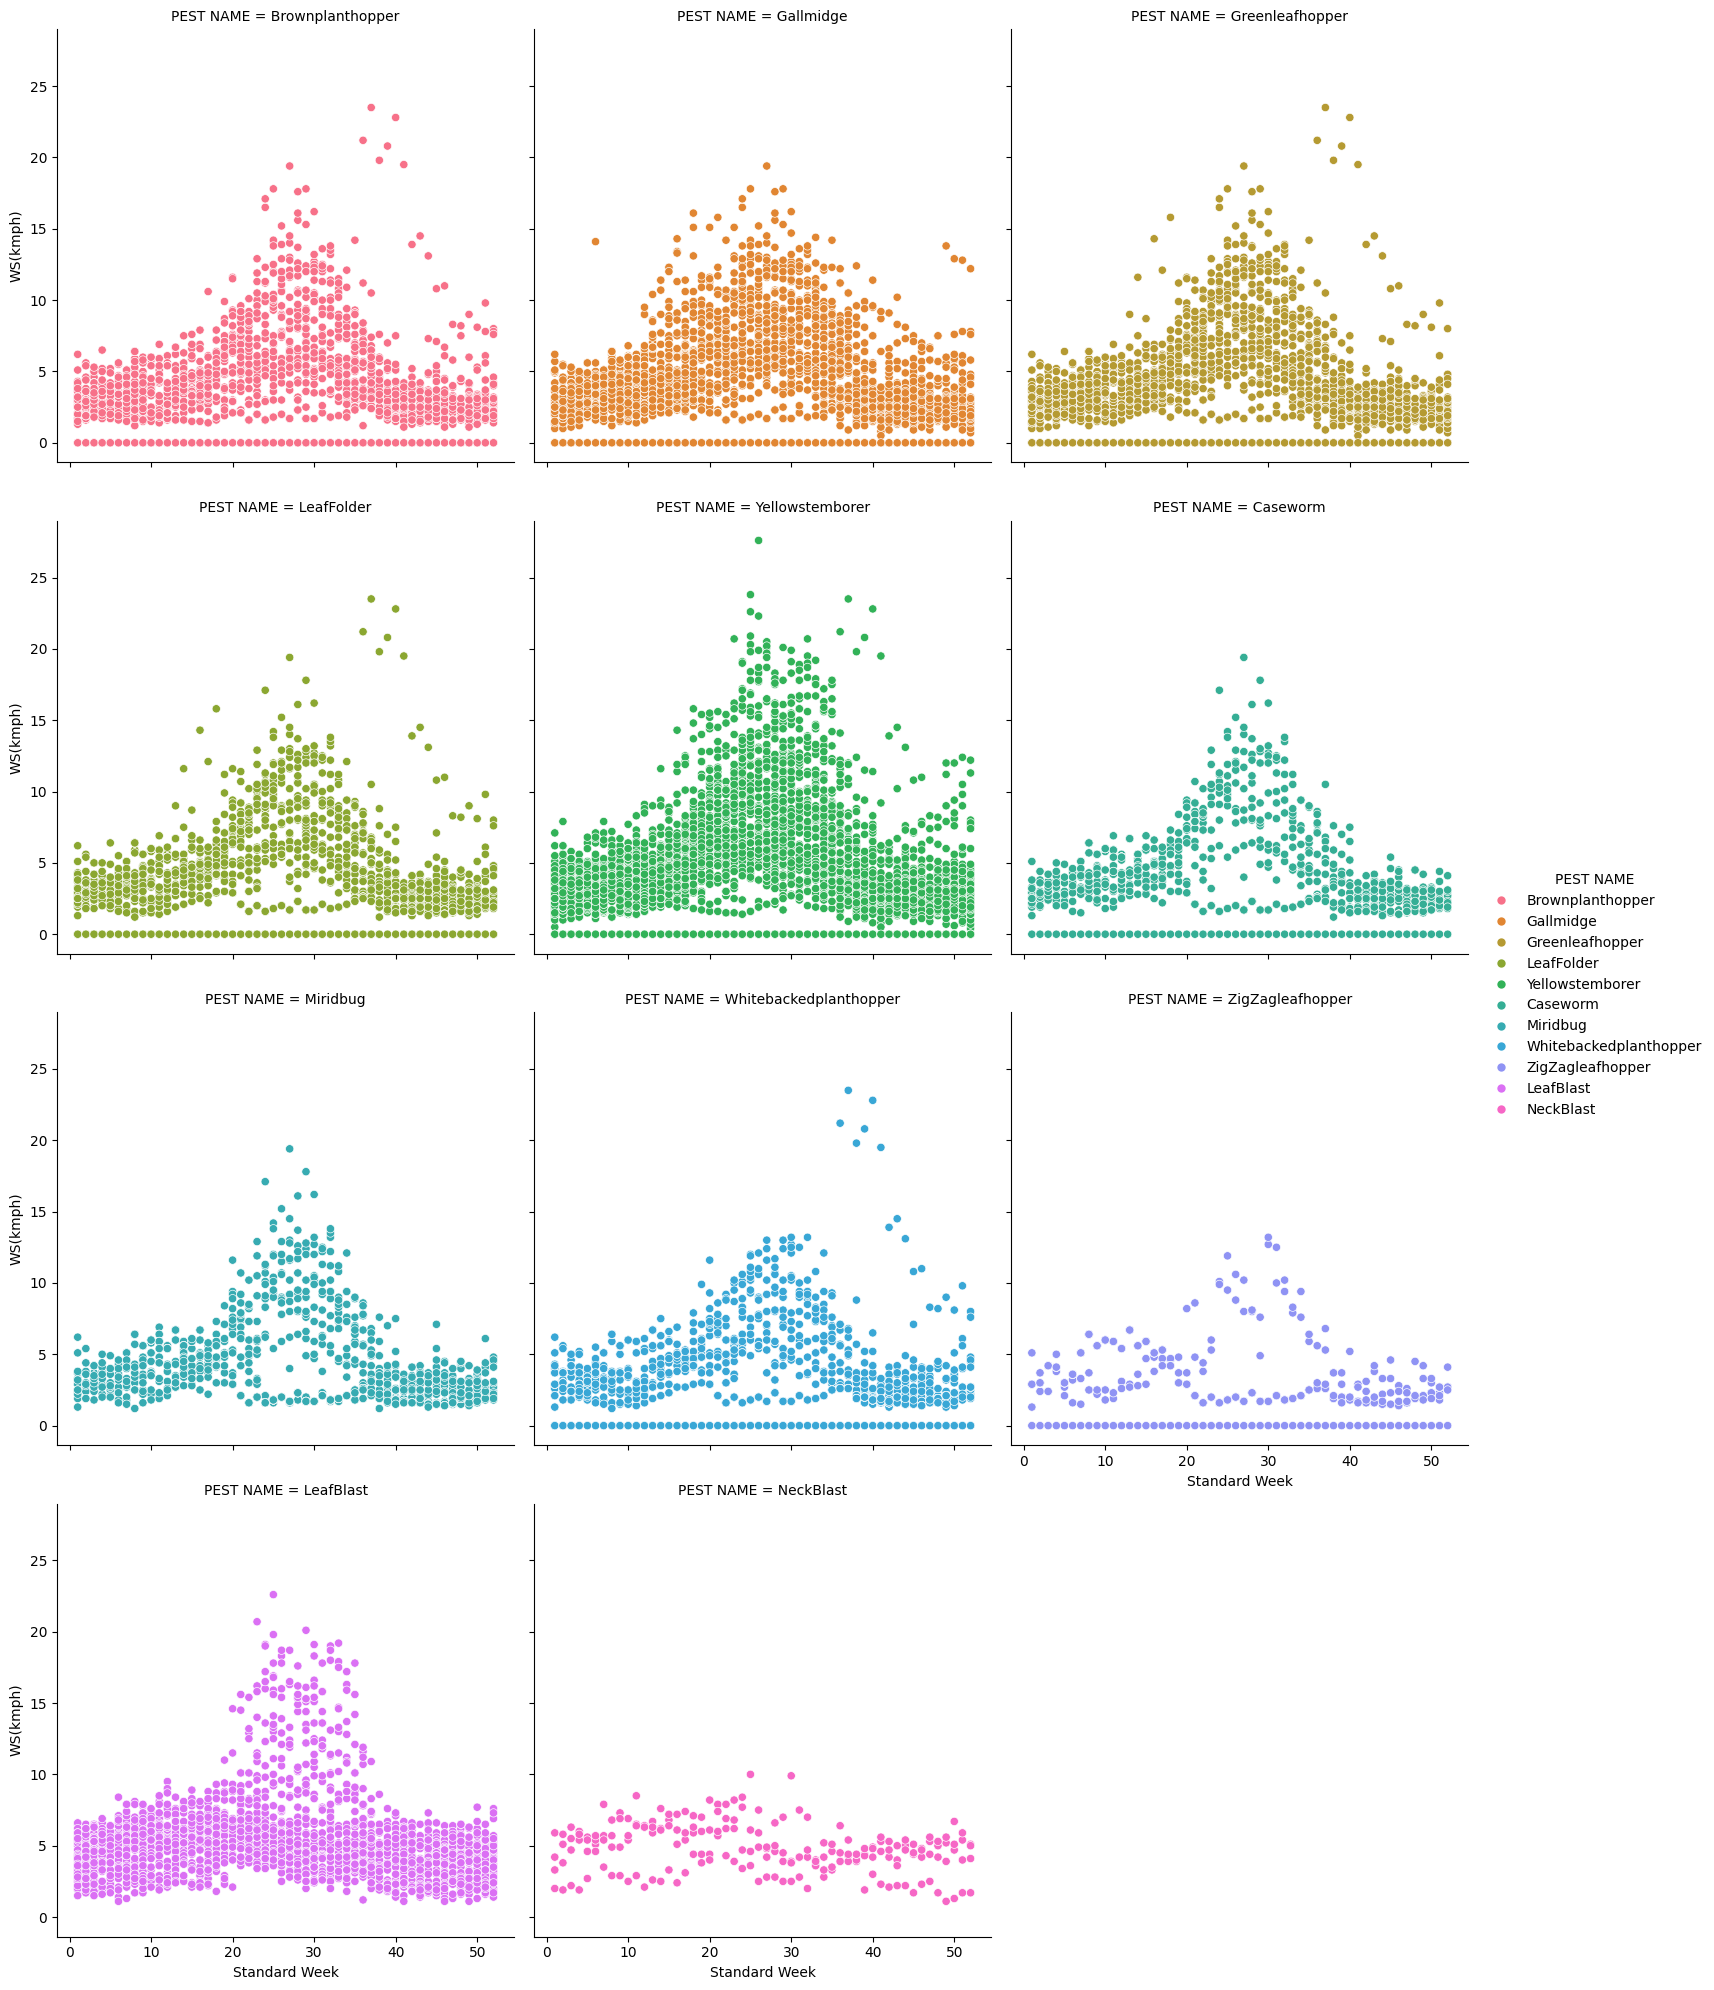

In [32]:
ax_rel = sns.relplot(data=rice_data, x='Standard Week',y = 'WS(kmph)', hue='PEST NAME', col='PEST NAME', kind = 'scatter', col_wrap=3)

(16656, 14)


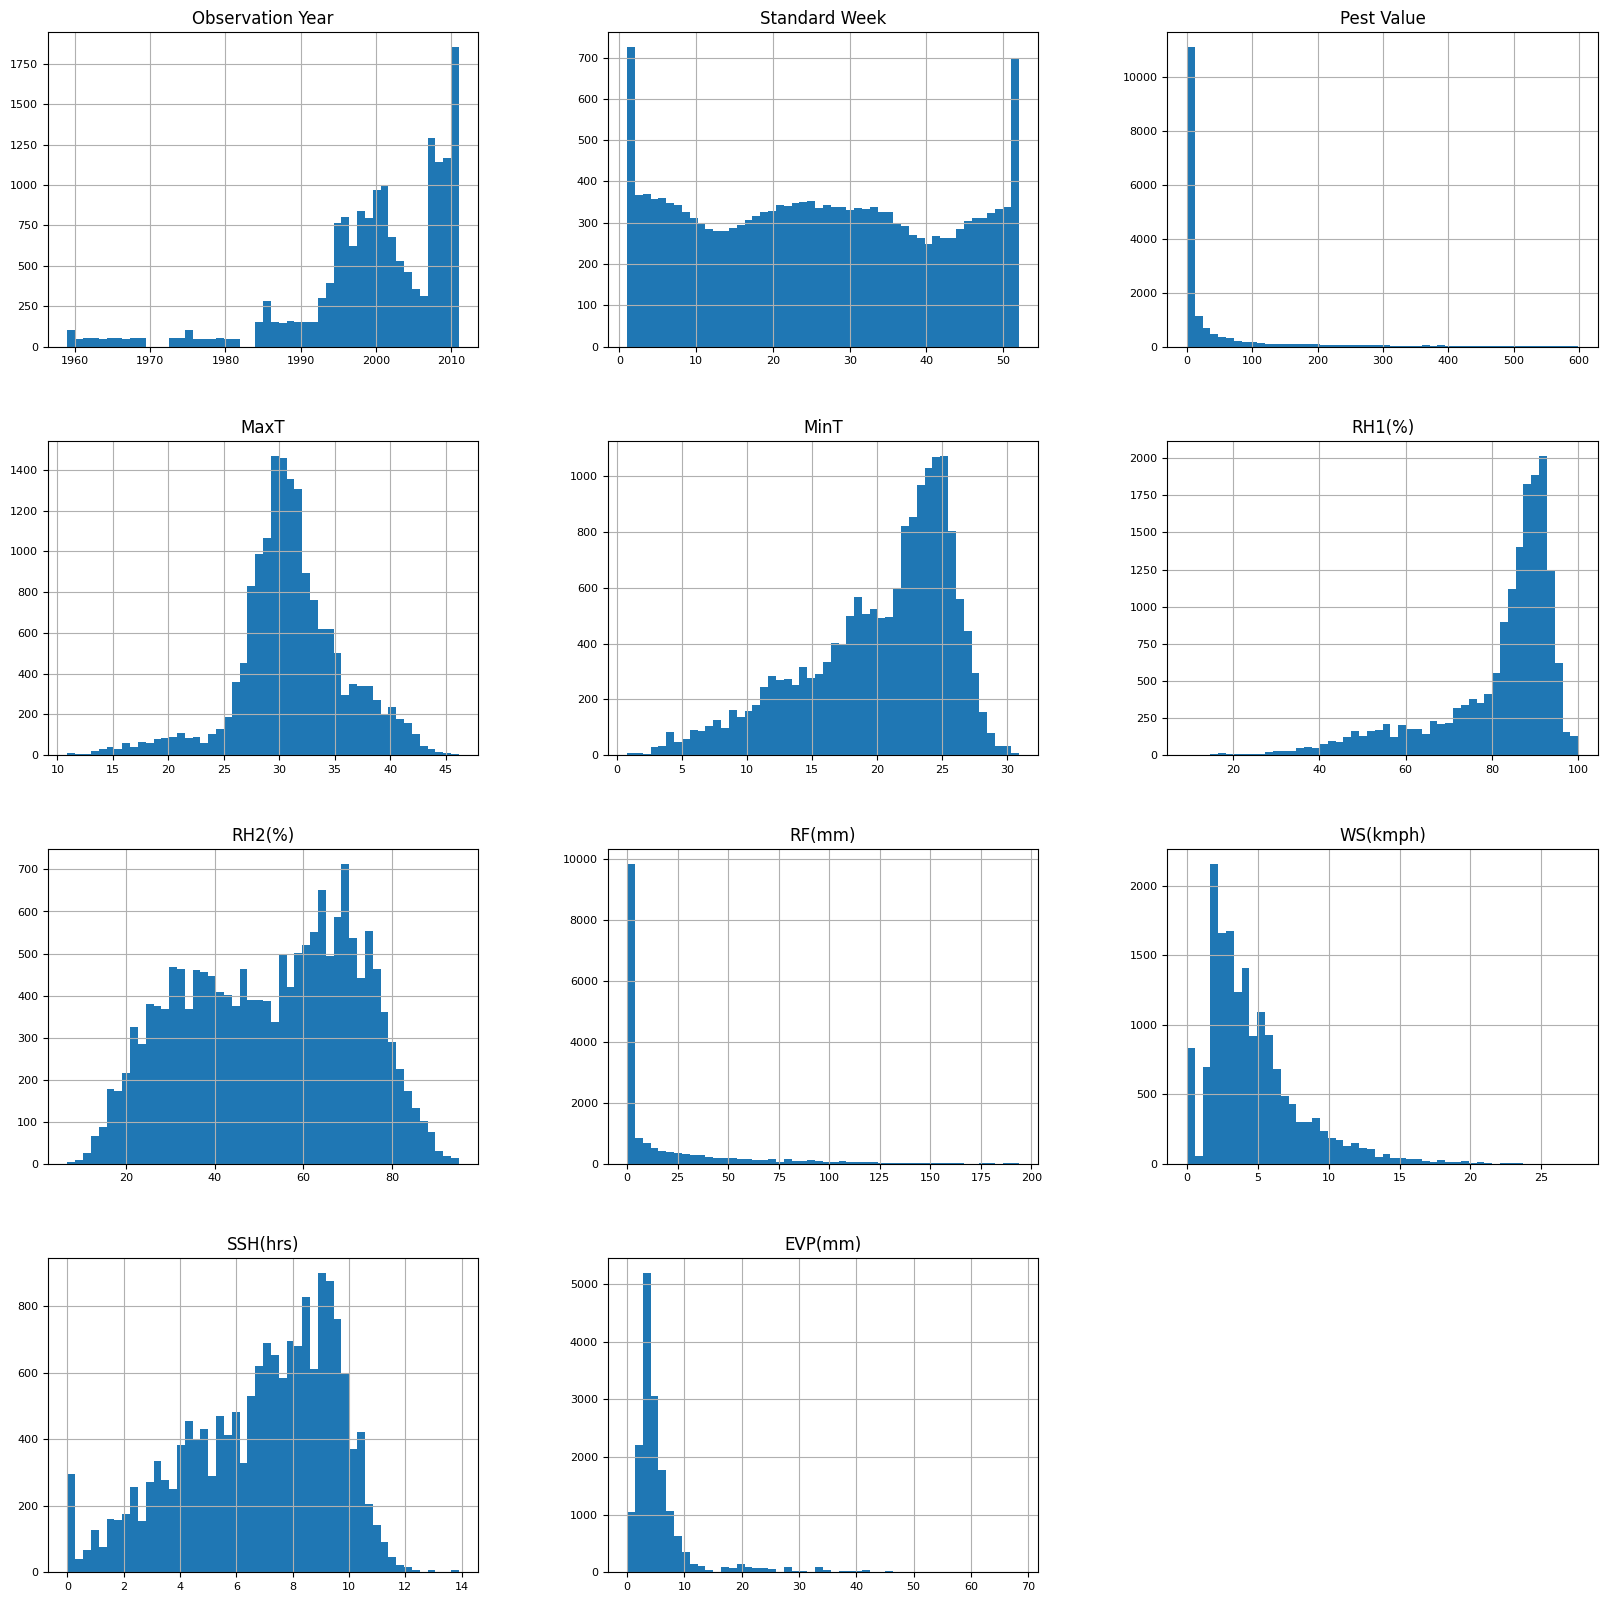

In [33]:
rice_data1 = rice_data[rice_data['Pest Value'] < 600]
rice_data1 = rice_data1[rice_data1['MaxT'] < 50]
rice_data1 = rice_data1[rice_data1['SSH(hrs)'] < 20]
rice_data1 = rice_data1[rice_data1['RF(mm)'] < 200]
print(rice_data1.shape)
rice_data1.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

***Majority of the Outliers has been removed. Let us now try to remove the less impactful columns.***

## Feature Engineering

In [34]:
model_data = rice_data1.drop(['Standard Week', 'Collection Type'], axis=1)
model_data

Observation Year  Pest Value  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  \
0                  2003         0.0  27.9  14.8    94.7    51.3     0.0   
1                  2003         0.0  27.2  15.0    93.9    53.1     0.0   
2                  2003         0.0  28.7  18.3    94.1    56.7     0.6   
3                  2003         0.0  25.3  16.4    90.9    57.4     0.3   
4                  2003         0.0  28.8  18.7    95.7    55.0     0.0   
...                 ...         ...   ...   ...     ...     ...     ...   
19399              2011        31.0  30.2  17.2    78.1    41.6     0.0   
19400              2011        38.0  30.5  12.9    84.3    33.4     0.0   
19401              2011         6.0  30.2  14.2    83.4    49.6     0.0   
19402              2011        13.0  29.0  11.8    81.9    49.3     0.0   
19403              2011         8.0  29.8  11.6    83.6    31.6     0.0   

       WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME       Location  
0           3.1       8.7      2.7  Brownplanthopper        Cuttack  
1           2.1       8.7      2.4  Brownplanthopper        Cuttack  
2           4.8       6.7      2.8  Brownplanthopper        Cuttack  
3           6.5       5.3      3.0  Brownplanthopper        Cuttack  
4           5.2       6.3      2.8  Brownplanthopper        Cuttack  
...         ...       ...      ...               ...            ...  
19399       0.0       0.0      0.0   Yellowstemborer  Rajendranagar  
19400       0.0       0.0      0.0   Yellowstemborer  Rajendranagar  
19401       0.0       0.0      0.0   Yellowstemborer  Rajendranagar  
19402       0.0       0.0      0.0   Yellowstemborer  Rajendranagar  
19403       0.0       0.0      0.0   Yellowstemborer  Rajendranagar  

[16656 rows x 12 columns]

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

le1 = LabelEncoder()
model_data['Observation Year'] = le1.fit_transform(model_data['Observation Year'])

le2 = LabelEncoder()
model_data['PEST NAME'] = le2.fit_transform(model_data['PEST NAME'])

model_data

Observation Year  Pest Value  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  \
0                    39         0.0  27.9  14.8    94.7    51.3     0.0   
1                    39         0.0  27.2  15.0    93.9    53.1     0.0   
2                    39         0.0  28.7  18.3    94.1    56.7     0.6   
3                    39         0.0  25.3  16.4    90.9    57.4     0.3   
4                    39         0.0  28.8  18.7    95.7    55.0     0.0   
...                 ...         ...   ...   ...     ...     ...     ...   
19399                47        31.0  30.2  17.2    78.1    41.6     0.0   
19400                47        38.0  30.5  12.9    84.3    33.4     0.0   
19401                47         6.0  30.2  14.2    83.4    49.6     0.0   
19402                47        13.0  29.0  11.8    81.9    49.3     0.0   
19403                47         8.0  29.8  11.6    83.6    31.6     0.0   

       WS(kmph)  SSH(hrs)  EVP(mm)  PEST NAME       Location  
0           3.1       8.7      2.7          0        Cuttack  
1           2.1       8.7      2.4          0        Cuttack  
2           4.8       6.7      2.8          0        Cuttack  
3           6.5       5.3      3.0          0        Cuttack  
4           5.2       6.3      2.8          0        Cuttack  
...         ...       ...      ...        ...            ...  
19399       0.0       0.0      0.0          9  Rajendranagar  
19400       0.0       0.0      0.0          9  Rajendranagar  
19401       0.0       0.0      0.0          9  Rajendranagar  
19402       0.0       0.0      0.0          9  Rajendranagar  
19403       0.0       0.0      0.0          9  Rajendranagar  

[16656 rows x 12 columns]

In [36]:
final_model_data = pd.get_dummies(data=model_data, drop_first=True)
final_model_data.head()

Observation Year  Pest Value  MaxT  MinT  RH1(%)  RH2(%)  RF(mm)  WS(kmph)  \
0                39         0.0  27.9  14.8    94.7    51.3     0.0       3.1   
1                39         0.0  27.2  15.0    93.9    53.1     0.0       2.1   
2                39         0.0  28.7  18.3    94.1    56.7     0.6       4.8   
3                39         0.0  25.3  16.4    90.9    57.4     0.3       6.5   
4                39         0.0  28.8  18.7    95.7    55.0     0.0       5.2   

   SSH(hrs)  EVP(mm)  PEST NAME  Location_Ludhiana  Location_Maruteru  \
0       8.7      2.7          0              False              False   
1       8.7      2.4          0              False              False   
2       6.7      2.8          0              False              False   
3       5.3      3.0          0              False              False   
4       6.3      2.8          0              False              False   

   Location_Palampur  Location_Raipur  Location_Rajendranagar  
0              False            False                   False  
1              False            False                   False  
2              False            False                   False  
3              False            False                   False  
4              False            False                   False

In [37]:
final_model_data.dtypes

Observation Year            int64
Pest Value                float64
MaxT                      float64
MinT                      float64
RH1(%)                    float64
RH2(%)                    float64
RF(mm)                    float64
WS(kmph)                  float64
SSH(hrs)                  float64
EVP(mm)                   float64
PEST NAME                   int64
Location_Ludhiana            bool
Location_Maruteru            bool
Location_Palampur            bool
Location_Raipur              bool
Location_Rajendranagar       bool
dtype: object

## Train the model

In [38]:
# Now that we have all the columns in numerical datatype let us try to train the model and find the accuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Y = final_model_data['PEST NAME']
X = final_model_data.drop('PEST NAME', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [39]:
import warnings
warnings.filterwarnings("ignore")

def best_model(x,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params':{'fit_intercept': [True, False]}
        },

#        'SVC' : {
#            'model': SVC(),
#            'params':{
#                'kernel' : ['rbf', 'poly', 'sigmoid'],
#                'degree': [2,3,4],
#                'gamma': ['scale', 'auto', 0.22]
#            }
#        },
        'decision_tree' : {
            'model': DecisionTreeClassifier(),
            'params':{
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_features': ['auto', 'sqrt', 'log2']
            }
        },
        'Adaboost': {
            'model': AdaBoostClassifier(),
            'params':{
                'n_estimators': [50,100],
                'learning_rate': [1,1.5,2]
            }
        },
        'GaussionNB':{
            'model': GaussianNB(),
            'params':{
            }
        },
        'SGDClassifier': {
            'model': SGDClassifier(),
            'params':{
                'loss' : ['hinge', 'perceptron', 'squared_error'],
                'learning_rate': ['optimal', 'invscaling', 'adaptive']
            }
        },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_features': ['auto', 'sqrt', 'log2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        print(f'Working on {algo_name}......')
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
        print(f'Best accuracy for the Algorithm is {gs.best_score_}')
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
result = best_model(X,Y)
result

Working on logistic_regression......
Best accuracy for the Algorithm is 0.30384153661464586
Working on decision_tree......
Best accuracy for the Algorithm is 0.2978391356542617
Working on Adaboost......
Best accuracy for the Algorithm is 0.29327731092436976
Working on GaussionNB......
Best accuracy for the Algorithm is 0.20738295318127248
Working on SGDClassifier......
Best accuracy for the Algorithm is 0.25
Working on RandomForest......
Best accuracy for the Algorithm is 0.3163265306122449


model  best_score  \
0  logistic_regression    0.303842   
1        decision_tree    0.297839   
2             Adaboost    0.293277   
3           GaussionNB    0.207383   
4        SGDClassifier    0.250000   
5         RandomForest    0.316327   

                                         best_params  
0                           {'fit_intercept': False}  
1  {'criterion': 'log_loss', 'max_features': 'log2'}  
2           {'learning_rate': 1, 'n_estimators': 50}  
3                                                 {}  
4  {'learning_rate': 'optimal', 'loss': 'perceptr...  
5  {'criterion': 'log_loss', 'max_features': 'log2'}

## CONCLUSION



*   ***During our exploratory data analysis we could find that there was no significant amount of correlation of multiple data points with the pests. We tried to explore different ways to find the relationship between datapoints but the only relation we could establish was that until 1990s only few Pests were found and as we entered the 20th century the types of Pests increased.***

*   ***The results thus indicate that the data available is insuffient to predict the type of Pests present in the rice plants. We need additional information such as quality of seeds used, type of fertilisers used, percentage of plant that is infected by the pests, the spread of the pests over different weeks to identify the acceleration of the growth of the pests. These additional information might help in identifying the type of pest that might be infected on the rice plants***

